In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Import data
df = pd.read_csv('./data_files/medical_examination.csv')

# Add 'overweight' column
BMI=df['weight']/((df['height']/100)**2)
df['overweight'] = BMI
df['overweight'] = np.where(df['overweight']>25, 1, 0)

# Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. 
#If the value is more than 1, make the value 1.
df['cholesterol'] = np.where(df['cholesterol']==1, 0, 1)
df['gluc'] = np.where(df['gluc']==1, 0, 1)


# Draw Categorical Plot
def draw_cat_plot(df):
    """Creates DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 
    'alco', 'active', and 'overweight'.
    """

    
    df_cat = pd.melt(df, id_vars =['cardio'], value_vars =['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
    df_cat.head()
    df_cat.sort_values(by=['cardio','variable'], inplace=True)
    df_cat.reset_index(drop=True, inplace=True)
    df_cat.head()
    # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. 
    #You will have to rename one of the columns for the catplot to work correctly.
   
    df_cat = df_cat.groupby(['cardio','variable', 'value'], as_index = False).size().rename(columns={'size':'total'})
   

    # Draw the catplot with 'sns.catplot()'
    fig = sns.catplot(x="variable",
                y ="total",
                kind='bar',
                hue='value',
                col='cardio',
                data=df_cat)


    
    fig.savefig('images/catplot.png')
    

In [2]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    #Filter out the following patient segments that represent incorrect data:
    #diastolic pressure is higher than systolic (Keep the correct data with (df['ap_lo'] <= df['ap_hi']))
    #height is less than the 2.5th percentile (Keep the correct data with (df['height'] >= df['height'].quantile(0.025)))
    #height is more than the 97.5th percentile
    #weight is less than the 2.5th percentile
    #weight is more than the 97.5th percentile
    df_heat = df[(df['ap_lo'] <= df['ap_hi'])&
             (df['height'] >= df['height'].quantile(0.025))&
            (df['height'] <= df['height'].quantile(0.975))&
            (df['weight'] >= df['weight'].quantile(0.025))&
            (df['weight'] <= df['weight'].quantile(0.975))]

    # Calculate the correlation matrix
    corr=df_heat.corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(18, 10))

    # Draw the heatmap with 'sns.heatmap()'
    g=sns.heatmap(corr, mask=mask, square=True, annot=True, fmt=".1f", linewidths=.5, ax=ax)

    # Do not modify the next two lines
    fig.savefig('images/heatmap.png')
    

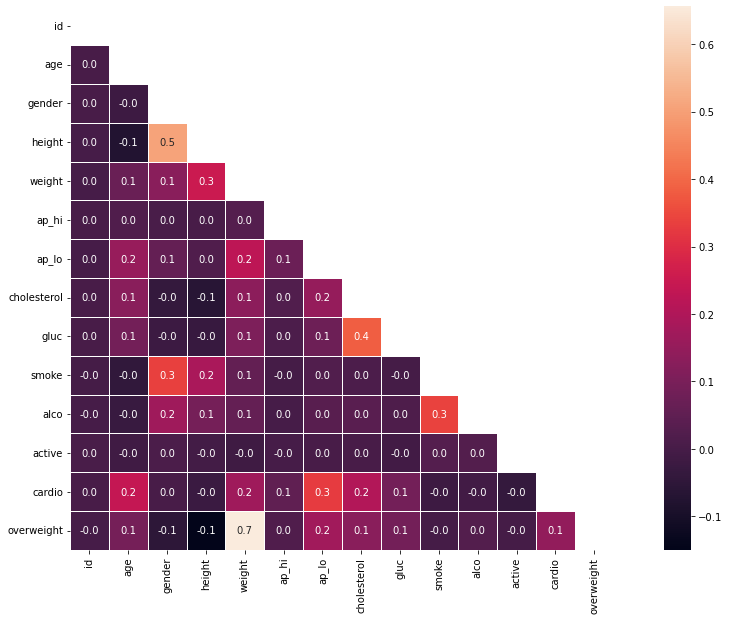

In [3]:
draw_heat_map()

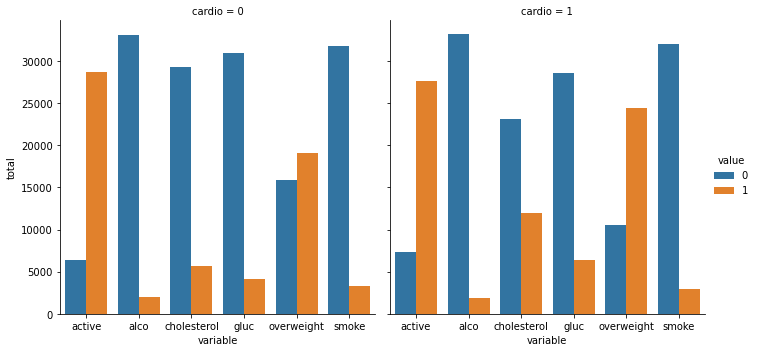

In [19]:
draw_cat_plot(df)